## PART 01 - Analyze Dataset

In [180]:
import numpy as numpy
import pandas as pds
import seaborn as sen
import matplotlib.pyplot as mplt
%matplotlib inline

### 01. Loading dataset

In [181]:
data = pds.read_csv('../data/dataset.csv')
data.head(10)

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,low,1
5,MILLER,0.41,0.50,2,153,3,0,1,0,sales,low,1
6,DAVIS,0.10,0.77,6,247,4,0,1,0,sales,low,1
7,GARCIA,0.92,0.85,5,259,5,0,1,0,sales,low,1
8,RODRIGUEZ,0.89,1.00,5,224,5,0,1,0,sales,low,1
9,WILSON,0.42,0.53,2,142,3,0,1,0,sales,low,1


### 02. Correlations analyze

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242
time_spent_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5_years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary_level,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


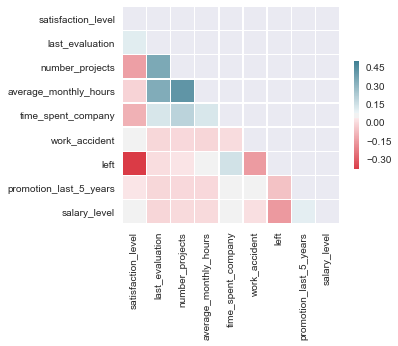

In [182]:
sen.set_style("darkgrid")

# Calculate correlation matrix
corr = data.corr()


# Generate a mask for the upper triangle
mask = numpy.zeros_like(corr, dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True

# Matplotlib figure setting
f, ax = mplt.subplots(figsize=(5, 4))

# Diverging colormap generate
cmap = sen.diverging_palette(10, 220, as_cmap=True)

# Output heatmap with the mask and correct aspect ratio
sen.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
corr


### 03. Features analyze 

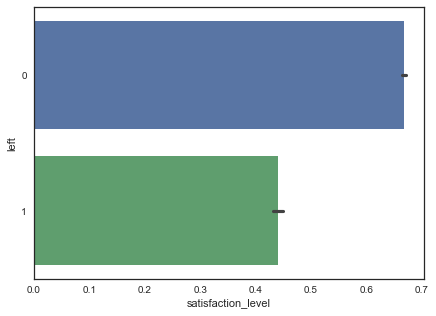

In [183]:
sen.set_style("white")
f, ax = mplt.subplots(figsize=(7, 5))
sen.barplot(x=data.satisfaction_level,y=data.left,orient="h", ax=ax)

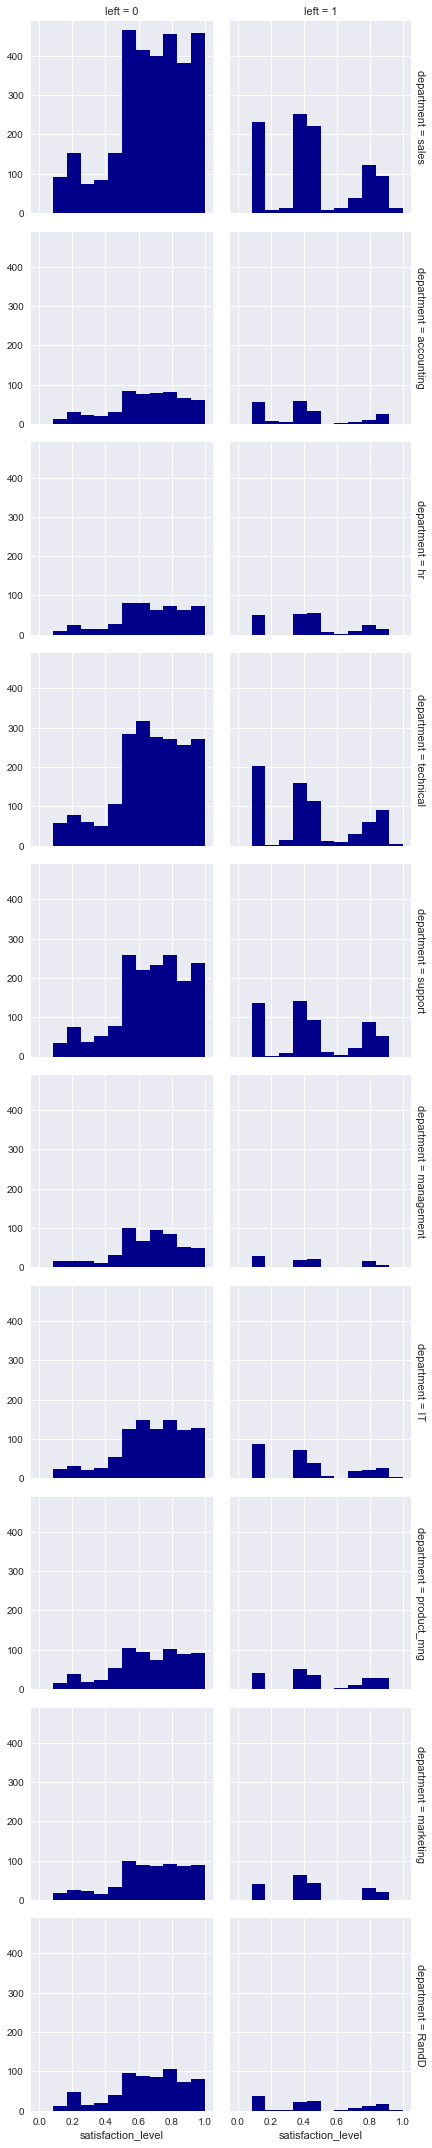

In [184]:
sen.set(style="darkgrid")
g = sen.FacetGrid(data, row="department", col="left", margin_titles=True)
bins = numpy.linspace(0, 1, 13)
g.map(mplt.hist, "satisfaction_level", color="darkblue", bins=bins, lw=0)

###  04. Employee leavers analysis

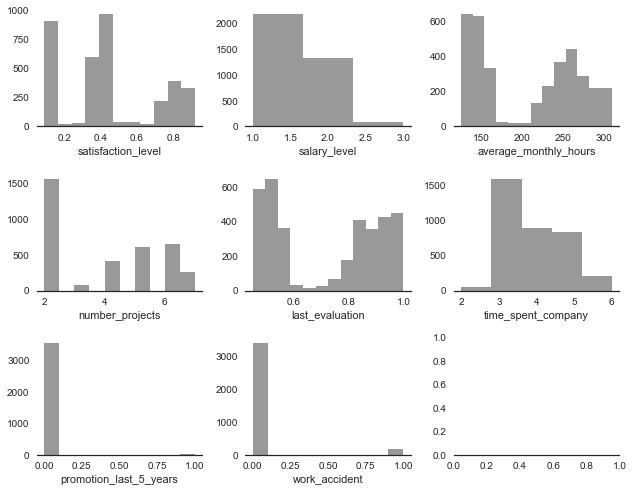

In [185]:
sen.set(style="white", palette="muted", color_codes=True)

# Matplotlib figure setting
f, axes = mplt.subplots(3, 3, figsize=(9,7))
sen.despine(left=True)

#Left employees
leavers = data.loc[data['left'] == 1]

# Plot a simple histogram with binsize determined automatically
sen.distplot(leavers['satisfaction_level'], kde=False, color="black", ax=axes[0,0])
sen.distplot(leavers['salary_level'], bins=3, kde=False, color="black", ax=axes[0, 1])
sen.distplot(leavers['average_monthly_hours'], kde=False, color="black", ax=axes[0, 2])
sen.distplot(leavers['number_projects'], kde=False, color="black", ax=axes[1,0])
sen.distplot(leavers['last_evaluation'], kde=False, color="black", ax=axes[1, 1])
sen.distplot(leavers['time_spent_company'], kde=False, bins=5, color="black", ax=axes[1, 2])
sen.distplot(leavers['promotion_last_5_years'],bins=10, kde=False, color="black", ax=axes[2,0])
sen.distplot(leavers['work_accident'], bins=10,kde=False, color="black", ax=axes[2, 1])


mplt.tight_layout()

### 05. Filter key employees

In [186]:
#all key employees
key_employees = data.loc[data['last_evaluation'] > 0.7].loc[data['time_spent_company'] >= 3]
key_employees.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
count,6123.000000,6123.000000,6123.000000,6123.000000,6123.000000,6123.000000,6123.000000,6123.000000,6123.000000
mean,0.603059,0.864467,4.301813,219.332027,4.127225,0.138984,0.304426,0.022865,1.583374
std,0.287024,0.083265,1.215323,48.552356,1.383378,0.345958,0.460201,0.149484,0.629788
min,0.090000,0.710000,2.000000,96.000000,3.000000,0.000000,0.000000,0.000000,1.000000
25%,0.430000,0.800000,3.000000,180.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.690000,0.870000,4.000000,229.000000,4.000000,0.000000,0.000000,0.000000,2.000000
75%,0.830000,0.930000,5.000000,258.000000,5.000000,0.000000,1.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [187]:
#lost key employees
lost_key_employees = key_employees.loc[data['left']==1]
lost_key_employees.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
count,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.0,1864.000000,1864.000000
mean,0.462328,0.896357,5.325107,257.935622,4.622318,0.047747,1.0,0.002146,1.409871
std,0.354372,0.067570,1.061447,30.686214,0.695091,0.213287,0.0,0.046287,0.521599
min,0.090000,0.710000,2.000000,130.000000,3.000000,0.000000,1.0,0.000000,1.000000
25%,0.100000,0.840000,5.000000,243.000000,4.000000,0.000000,1.0,0.000000,1.000000
50%,0.505000,0.900000,5.000000,258.000000,5.000000,0.000000,1.0,0.000000,1.000000
75%,0.820000,0.950000,6.000000,278.000000,5.000000,0.000000,1.0,0.000000,2.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000,3.000000


In [188]:
print ("Key employees count: ", len(key_employees))
print ("Lost key employees count: ", len(lost_key_employees))
print ("Lost key employees as percentage: ", round((float(len(lost_key_employees))/float(len(key_employees))*100),2),"%")

Key employees count:  6123
Lost key employees count:  1864
Lost key employees as percentage:  30.44 %


In [189]:
#save key employees to csv
key_employees.to_csv('../output/PART01/key_employees.csv')

In [190]:
#save key employees to csv
lost_key_employees.to_csv('../output/PART01/leaved_key_employees.csv')

### 06. Analyze performing employees leave

In [191]:
#filter emplyees with good last evaluation
leaving_performers = leavers.loc[leavers['last_evaluation'] > 0.7]

In [192]:
#save performing employees to csv
leaving_performers.to_csv('../output/PART01/leaved_performing_employees.csv')

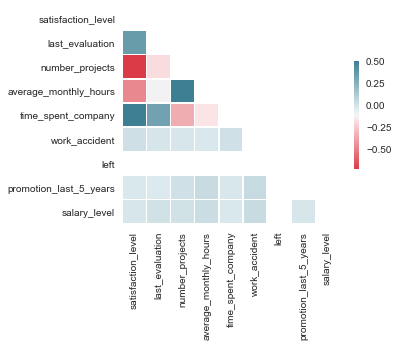

In [193]:
sen.set(style="white")

# Correlation matrix
corr = leaving_performers.corr()

# Generate a mask for the upper triangle
mask = numpy.zeros_like(corr, dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True

# Matplotlib figure setting
f, ax = mplt.subplots(figsize=(5, 4))

# Colormap
cmap = sen.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap
sen.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### 07. Analyze satisfied employees leave

In [194]:
#filter employees with a good satisfaction level
satisfied_employees = data.loc[data['satisfaction_level'] > 0.7]

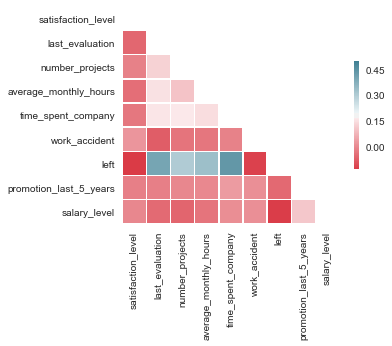

In [195]:
sen.set(style="white")

# correlation matrix
corr = satisfied_employees.corr()

# Generate a mask for the upper triangle
mask = numpy.zeros_like(corr, dtype=numpy.bool)
mask[numpy.triu_indices_from(mask)] = True

# matplotlib figure
f, ax = mplt.subplots(figsize=(5, 4))

# colormap
cmap = sen.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap
sen.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)